## Data Preprocessing

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-nadeem9/brca-epigenetic-age-acceleration-immune-multiomics-classifier/blob/main/notebooks/01a_data_preprocessing.ipynb)


In [2]:
import pandas as pd

Converting csv to hdf5 format for faster I/Os

In [3]:
rna_df = pd.read_csv("../data/rna_matched.csv", index_col=0)
rna_df.to_hdf("../data/rna_seq.h5", key="data", mode="w")

In [4]:
meth_df = pd.read_csv("../data/meth_matched.csv", index_col=0)
meth_df.to_hdf("../data/methylation.h5", key="data", mode="w")


In [5]:
rna_df = pd.read_hdf("../data/rna_seq.h5", key="data")

In [6]:
rna_df.head(5)

,TCGA-GM-A2DL-01A-11R-A18M-07,TCGA-AC-A2QI-01A-12R-A19W-07,TCGA-EW-A1PD-01A-11R-A144-07,TCGA-AR-A24N-01A-11R-A169-07,TCGA-AR-A24U-01A-11R-A169-07,TCGA-D8-A1JU-01A-11R-A13Q-07,TCGA-A8-A0AD-01A-11R-A056-07,TCGA-E2-A3DX-01A-21R-A213-07,TCGA-A2-A0YL-01A-21R-A109-07,TCGA-AO-A0JA-01A-11R-A056-07,...,TCGA-E9-A1N3-01A-12R-A157-07,TCGA-BH-A0B3-11B-21R-A089-07,TCGA-E2-A15K-01A-11R-A12P-07,TCGA-AC-A7VB-01A-11R-A352-07,TCGA-LD-A7W5-01A-22R-A352-07,TCGA-B6-A0RL-01A-11R-A084-07,TCGA-C8-A8HP-01A-11R-A36F-07,TCGA-EW-A3U0-01A-11R-A22K-07,TCGA-D8-A1J9-01A-11R-A13Q-07,TCGA-V7-A7HQ-01A-11R-A33J-07
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,1262,2922,5617,2519,3647,2376,1682,4142,5313,1505,...,2287,6764,334,3958,6485,1938,753,3052,2275,2293
ENSG00000000005.6,120,4,148,3,52,87,9,30,19,21,...,25,462,15,18,39,0,6,141,0,5
ENSG00000000419.13,1535,1779,1994,2398,2990,2242,1433,1595,1766,1741,...,1900,1916,1632,2113,2088,3701,2383,2129,2973,703
ENSG00000000457.14,885,2574,1335,2931,1626,2331,614,1903,2266,1947,...,2022,1888,2210,1830,1530,1695,692,1190,4005,317
ENSG00000000460.17,328,586,678,1147,1307,500,337,374,1001,884,...,358,377,1400,931,543,1169,332,1026,1109,49


In [7]:
rna_df.shape

(60660, 903)

Hmm. 903 unique values, but we only have 789 distinct patients. Why is this? Let's check if methylation dataset has the same issue.

In [8]:
# percentage of missing values in rna_df
print('Missing values in rna dataset: ', round((rna_df.isnull().sum().sum() )/ (rna_df.shape[0] * rna_df.shape[1]) * 100, 2), "%")


Missing values in rna dataset:  0.0 %


In [9]:
meth_df = pd.read_hdf("../data/methylation.h5", key="data")

In [10]:
meth_df.head(5)

,TCGA-C8-A27B-01A-11D-A16A-05,TCGA-E9-A3Q9-01A-11D-A21R-05,TCGA-C8-A3M8-01A-11D-A212-05,TCGA-E9-A5FL-01A-11D-A27Y-05,TCGA-BH-A1FU-01A-11D-A14H-05,TCGA-A2-A25F-01A-11D-A16A-05,TCGA-A1-A0SE-01A-11D-A10P-05,TCGA-A7-A425-01A-11D-A244-05,TCGA-E9-A1N8-01A-11D-A145-05,TCGA-D8-A1X8-01A-11D-A14N-05,...,TCGA-AO-A03L-01A-41D-A10P-05,TCGA-BH-A0B8-11A-41D-A093-05,TCGA-AC-A6NO-01A-12D-A33F-05,TCGA-EW-A2FS-01A-11D-A17F-05,TCGA-BH-A0BJ-11A-23D-A10Q-05,TCGA-BH-A1FG-11B-12D-A13T-05,TCGA-BH-A1FG-01A-11D-A13K-05,TCGA-EW-A1PG-01A-11D-A145-05,TCGA-LL-A7T0-01A-31D-A357-05,TCGA-V7-A7HQ-01A-11D-A33F-05
ProbeID,,,,,,,,,,,,,,,,,,,,,
cg13869341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg14008030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg12045430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg20826792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00381604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So many NaNs, but its okay because methylation dataset is known to have null values. We will deal with it later. 

In [11]:
meth_df.shape

(485577, 893)

Methylation dataset has 893 values. More than what it should be i.e. 789. 

In [12]:
# percentage of missing values in meth_df
print('Missing values in methylation dataset: ', round((meth_df.isnull().sum().sum() )/ (meth_df.shape[0] * meth_df.shape[1]) * 100, 2), "%")

Missing values in methylation dataset:  15.47 %


We will definitely need to devise a good strategy to handle null values. 

In [13]:
meth_df.isnull().sum().sum()

np.int64(67068321)

In [14]:
meth_df.describe()

,TCGA-C8-A27B-01A-11D-A16A-05,TCGA-E9-A3Q9-01A-11D-A21R-05,TCGA-C8-A3M8-01A-11D-A212-05,TCGA-E9-A5FL-01A-11D-A27Y-05,TCGA-BH-A1FU-01A-11D-A14H-05,TCGA-A2-A25F-01A-11D-A16A-05,TCGA-A1-A0SE-01A-11D-A10P-05,TCGA-A7-A425-01A-11D-A244-05,TCGA-E9-A1N8-01A-11D-A145-05,TCGA-D8-A1X8-01A-11D-A14N-05,...,TCGA-AO-A03L-01A-41D-A10P-05,TCGA-BH-A0B8-11A-41D-A093-05,TCGA-AC-A6NO-01A-12D-A33F-05,TCGA-EW-A2FS-01A-11D-A17F-05,TCGA-BH-A0BJ-11A-23D-A10Q-05,TCGA-BH-A1FG-11B-12D-A13T-05,TCGA-BH-A1FG-01A-11D-A13K-05,TCGA-EW-A1PG-01A-11D-A145-05,TCGA-LL-A7T0-01A-31D-A357-05,TCGA-V7-A7HQ-01A-11D-A33F-05
count,416379.000000,417117.000000,416201.000000,420075.000000,419445.000000,418456.000000,409737.000000,416719.000000,418119.000000,417820.000000,...,407459.000000,406933.000000,412503.000000,419024.000000,395896.000000,419615.000000,417266.000000,419343.000000,417902.000000,417141.000000
mean,0.493438,0.438755,0.521036,0.479431,0.503812,0.515907,0.496918,0.479045,0.471395,0.497214,...,0.496576,0.485644,0.469139,0.507255,0.497396,0.486665,0.501263,0.491093,0.524177,0.483710
std,0.378345,0.350029,0.355000,0.360518,0.360192,0.366624,0.366278,0.360229,0.398276,0.366414,...,0.350884,0.379861,0.362226,0.346869,0.387118,0.376428,0.387773,0.362093,0.371884,0.366337
min,0.007028,0.007134,0.006682,0.005938,0.007035,0.008124,0.006511,0.006176,0.005925,0.005709,...,0.006802,0.005740,0.006911,0.006965,0.004805,0.004628,0.005681,0.005326,0.006864,0.007428
25%,0.071884,0.075220,0.097320,0.066550,0.085192,0.094298,0.072453,0.070016,0.053660,0.073308,...,0.093504,0.061389,0.075822,0.110056,0.057660,0.062969,0.061518,0.071020,0.075222,0.076991
50%,0.514710,0.377949,0.593299,0.523347,0.564680,0.600136,0.546381,0.497524,0.434600,0.537881,...,0.528819,0.529745,0.451753,0.548152,0.558455,0.524425,0.554849,0.538483,0.619038,0.499861
75%,0.895646,0.815175,0.872664,0.844368,0.865742,0.884122,0.874094,0.854436,0.906203,0.875899,...,0.851539,0.884180,0.857378,0.852016,0.898766,0.881295,0.905031,0.858201,0.894869,0.868072
max,0.992490,0.992720,0.993705,0.993902,0.992326,0.991367,0.993690,0.994264,0.994919,0.994061,...,0.993307,0.994739,0.992472,0.992593,0.996108,0.994643,0.994484,0.994140,0.993226,0.992993


Just going to quickly check if the 789 patient ids we got are unique or are there also duplicates there. 

In [15]:
p_df = pd.read_csv("../data/matched_patients.csv", index_col=0)

In [16]:
p_df.index.is_unique


True

All unique values, yay!

So patient ids are not the issue.

hypothesis: we have more samples than patients because some patients have >1 tumor sample

In [17]:
#Define helper functions

def get_patient_id(barcode):
    return "-".join(barcode.split("-")[:3])

def is_primary_tumor(barcode):
    return barcode.split("-")[3][:2] == "01"


In [18]:
#Filter to primary tumor samples only

# Create column Series
rna_cols = pd.Series(rna_df.columns)
meth_cols = pd.Series(meth_df.columns)

# Mask for primary tumor samples (sample type == '01')
rna_tumor_mask = rna_cols.apply(is_primary_tumor)
meth_tumor_mask = meth_cols.apply(is_primary_tumor)

# Filter data using aligned boolean masks
rna_df_tumor = rna_df.loc[:, rna_tumor_mask.values]
meth_df_tumor = meth_df.loc[:, meth_tumor_mask.values]


In [19]:
#Extract patient IDs for these samples
rna_patient_ids = rna_df_tumor.columns.to_series().apply(get_patient_id)
meth_patient_ids = meth_df_tumor.columns.to_series().apply(get_patient_id)


In [20]:
#Deduplicate to keep only first sample per patient
rna_keep_mask = ~rna_patient_ids.duplicated()
meth_keep_mask = ~meth_patient_ids.duplicated()

# Filter to one sample per patient
rna_df_clean = rna_df_tumor.loc[:, rna_keep_mask]
meth_df_clean = meth_df_tumor.loc[:, meth_keep_mask]


In [21]:
# Align both datasets to shared patients

# Get patient IDs again
rna_patient_ids = rna_df_clean.columns.to_series().apply(get_patient_id)
meth_patient_ids = meth_df_clean.columns.to_series().apply(get_patient_id)

# Find shared patients
shared_ids = set(rna_patient_ids) & set(meth_patient_ids)

# Keep only shared patients
rna_final = rna_df_clean.loc[:, rna_patient_ids.isin(shared_ids)]
meth_final = meth_df_clean.loc[:, meth_patient_ids.isin(shared_ids)]


In [22]:
rna_final.shape

(60660, 782)

In [23]:
rna_final.head(5)

,TCGA-GM-A2DL-01A-11R-A18M-07,TCGA-AC-A2QI-01A-12R-A19W-07,TCGA-EW-A1PD-01A-11R-A144-07,TCGA-AR-A24N-01A-11R-A169-07,TCGA-AR-A24U-01A-11R-A169-07,TCGA-D8-A1JU-01A-11R-A13Q-07,TCGA-A8-A0AD-01A-11R-A056-07,TCGA-E2-A3DX-01A-21R-A213-07,TCGA-A2-A0YL-01A-21R-A109-07,TCGA-AO-A0JA-01A-11R-A056-07,...,TCGA-B6-A0X1-01A-11R-A109-07,TCGA-E9-A1N3-01A-12R-A157-07,TCGA-E2-A15K-01A-11R-A12P-07,TCGA-AC-A7VB-01A-11R-A352-07,TCGA-LD-A7W5-01A-22R-A352-07,TCGA-B6-A0RL-01A-11R-A084-07,TCGA-C8-A8HP-01A-11R-A36F-07,TCGA-EW-A3U0-01A-11R-A22K-07,TCGA-D8-A1J9-01A-11R-A13Q-07,TCGA-V7-A7HQ-01A-11R-A33J-07
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,1262,2922,5617,2519,3647,2376,1682,4142,5313,1505,...,1053,2287,334,3958,6485,1938,753,3052,2275,2293
ENSG00000000005.6,120,4,148,3,52,87,9,30,19,21,...,1,25,15,18,39,0,6,141,0,5
ENSG00000000419.13,1535,1779,1994,2398,2990,2242,1433,1595,1766,1741,...,1449,1900,1632,2113,2088,3701,2383,2129,2973,703
ENSG00000000457.14,885,2574,1335,2931,1626,2331,614,1903,2266,1947,...,618,2022,2210,1830,1530,1695,692,1190,4005,317
ENSG00000000460.17,328,586,678,1147,1307,500,337,374,1001,884,...,597,358,1400,931,543,1169,332,1026,1109,49


In [24]:
meth_final.shape

(485577, 782)

In [25]:
meth_final.head(5)

,TCGA-C8-A27B-01A-11D-A16A-05,TCGA-E9-A3Q9-01A-11D-A21R-05,TCGA-C8-A3M8-01A-11D-A212-05,TCGA-E9-A5FL-01A-11D-A27Y-05,TCGA-BH-A1FU-01A-11D-A14H-05,TCGA-A2-A25F-01A-11D-A16A-05,TCGA-A1-A0SE-01A-11D-A10P-05,TCGA-A7-A425-01A-11D-A244-05,TCGA-E9-A1N8-01A-11D-A145-05,TCGA-D8-A1X8-01A-11D-A14N-05,...,TCGA-AO-A0JC-01A-11D-A10P-05,TCGA-B6-A0X1-01A-11D-A10A-05,TCGA-E9-A22H-01A-11D-A161-05,TCGA-AO-A03L-01A-41D-A10P-05,TCGA-AC-A6NO-01A-12D-A33F-05,TCGA-EW-A2FS-01A-11D-A17F-05,TCGA-BH-A1FG-01A-11D-A13K-05,TCGA-EW-A1PG-01A-11D-A145-05,TCGA-LL-A7T0-01A-31D-A357-05,TCGA-V7-A7HQ-01A-11D-A33F-05
ProbeID,,,,,,,,,,,,,,,,,,,,,
cg13869341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg14008030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg12045430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg20826792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00381604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our Sample number came down to 782 from 789, because we filtered for primary tumor samples.

Let's save them for later use. 

In [26]:
rna_final.to_hdf("../data/rna_seq_primary_tumor.h5", key="data", mode="w")


In [29]:
meth_final.to_hdf("../data/meth_primary_tumor.h5", key="data", mode="w") 

Now let's filter our matched_patients.csv to reflect these 782 patients instead of 789.

In [30]:
p_id= pd.read_csv("../data/matched_patients.csv", header=0)


In [31]:
# Extract patient IDs from remaining RNA-seq tumor samples
def get_patient_id(barcode):
    return "-".join(barcode.split("-")[:3])

rna_patient_ids = rna_df_tumor.columns.to_series().apply(get_patient_id)
meth_patient_ids = meth_df_tumor.columns.to_series().apply(get_patient_id)

# Get shared patient IDs between both datasets
shared_patient_ids = set(rna_patient_ids) & set(meth_patient_ids)

# Filter p_id DataFrame
p_id_filtered = p_id[p_id['patient_id'].isin(shared_patient_ids)]


In [32]:
p_id_filtered.to_csv("../data/matched_patients.csv", index=False)

Next, we also edit the tcga_brca_clinical metadata file to also have those 782 samples only. 

In [33]:
# Load matched patient IDs
matched_ids = pd.read_csv("../data/matched_patients.csv")

# Load clinical metadata
clinical_df = pd.read_csv("../data/tcga_brca_clinical_matched_with_subtypes.csv")


In [34]:
clinical_df.shape

(780, 103)

In [35]:
# Count the number of each unique subtype
subtype_counts = clinical_df['Subtype'].value_counts(dropna=False)
subtype_counts


Subtype
LumA      422
LumB      141
Basal     137
Her2       46
Normal     34
Name: count, dtype: int64

In [36]:
# Keep only rows where submitter_id is in matched patient list
clinical_filtered = clinical_df[clinical_df['submitter_id'].isin(matched_ids['patient_id'])]


In [37]:
clinical_df.shape

(780, 103)

In [38]:
clinical_df.head(5)

,project,submitter_id,synchronous_malignancy,ajcc_pathologic_stage,days_to_diagnosis,laterality,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,age_at_diagnosis,...,treatments_radiation_course_number,treatments_radiation_treatment_dose,treatments_radiation_number_of_fractions,treatments_radiation_treatment_dose_units,treatments_radiation_prescribed_dose_units,treatments_radiation_route_of_administration,treatments_radiation_prescribed_dose,treatments_radiation_number_of_cycles,bcr_patient_barcode,Subtype
0,TCGA-BRCA,TCGA-A7-A0DC,No,Stage IA,0.0,NaN,NaN,not reported,"Breast, NOS",23294.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A7-A0DC,LumA
1,TCGA-BRCA,TCGA-Z7-A8R6,No,Stage I,0.0,Left,NaN,NaN,Overlapping lesion of breast,16955.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-Z7-A8R6,LumB
2,TCGA-BRCA,TCGA-C8-A1HE,No,Stage IIA,0.0,Right,NaN,NaN,"Breast, NOS",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-C8-A1HE,LumA
3,TCGA-BRCA,TCGA-AC-A2FM,No,Stage IIB,0.0,Right,NaN,NaN,"Breast, NOS",31805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-AC-A2FM,LumA
4,TCGA-BRCA,TCGA-B6-A1KF,No,Stage IIB,0.0,Right,NaN,NaN,"Breast, NOS",24891.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-B6-A1KF,Basal


In [39]:
clinical_df.shape

(780, 103)

In [40]:
# Filter the DataFrame to keep only Luminal (from LumA and LumB) and Basal subtypes
df_filtered = clinical_df[clinical_df['Subtype'].isin(['LumA', 'LumB', 'Basal'])].copy()

# Create binary labels: Luminal (from LumA, LumB), Basal
df_filtered['Subtype_binary'] = df_filtered['Subtype'].replace({'LumA': 'Luminal', 'LumB': 'Luminal', 'Basal': 'Basal'})

# Count final classes
final_counts = df_filtered['Subtype_binary'].value_counts()
final_counts


Subtype_binary
Luminal    563
Basal      137
Name: count, dtype: int64

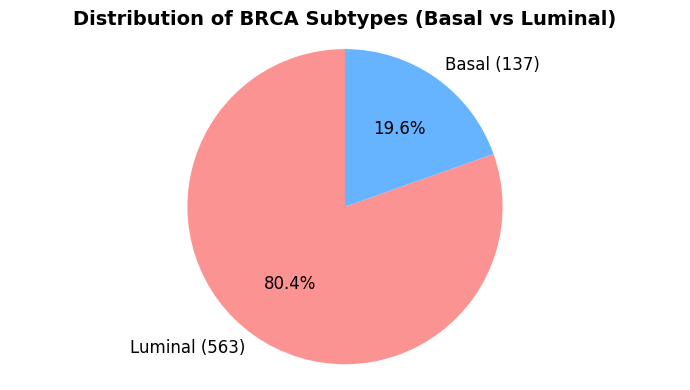

In [41]:
import matplotlib.pyplot as plt

pie_counts = df_filtered['Subtype_binary'].value_counts()

# Plot a neater pie chart with styling
colors = ["#fc9393", '#66b3ff']  # Optional custom colors for contrast

plt.figure(figsize=(7, 4))
plt.pie(
    pie_counts,
    labels=[f'{label} ({count})' for label, count in zip(pie_counts.index, pie_counts)],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title("Distribution of BRCA Subtypes (Basal vs Luminal)", fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()



In [ ]:
# Sanitz check

# Load matched datasets
clinical_matched = pd.read_hdf("../data/clinical_matched_final.h5")
rna_matched = pd.read_hdf("../data/rna_seq_matched_final.h5")
meth_matched = pd.read_hdf("../data/methylation_matched_final.h5")

# Extract patient IDs
clinical_ids = clinical_matched['submitter_id'].str[:12].unique()
rna_ids = [col[:12] for col in rna_matched.columns]
meth_ids = [col[:12] for col in meth_matched.columns]

#  Compare sets
clinical_set = set(clinical_ids)
rna_set = set(rna_ids)
meth_set = set(meth_ids)

common = clinical_set & rna_set & meth_set

# Report
print(f"Clinical IDs:     {len(clinical_set)}")
print(f"RNA-seq IDs:      {len(rna_set)}")
print(f"Methylation IDs:  {len(meth_set)}")
print(f"Common IDs:       {len(common)}")

# Check for mismatches
missing_from_rna = clinical_set - rna_set
missing_from_meth = clinical_set - meth_set

print(f"\n Missing in RNA-seq:      {len(missing_from_rna)}")
print(f" Missing in Methylation:  {len(missing_from_meth)}")


Clinical IDs:     693
RNA-seq IDs:      693
Methylation IDs:  693
Common IDs:       693

 Missing in RNA-seq:      0
 Missing in Methylation:  0
